In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#Imports

import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
test_data.duplicated().sum()

0

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [11]:
train_num = train[['Age','SibSp','Parch','Fare']]
train_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

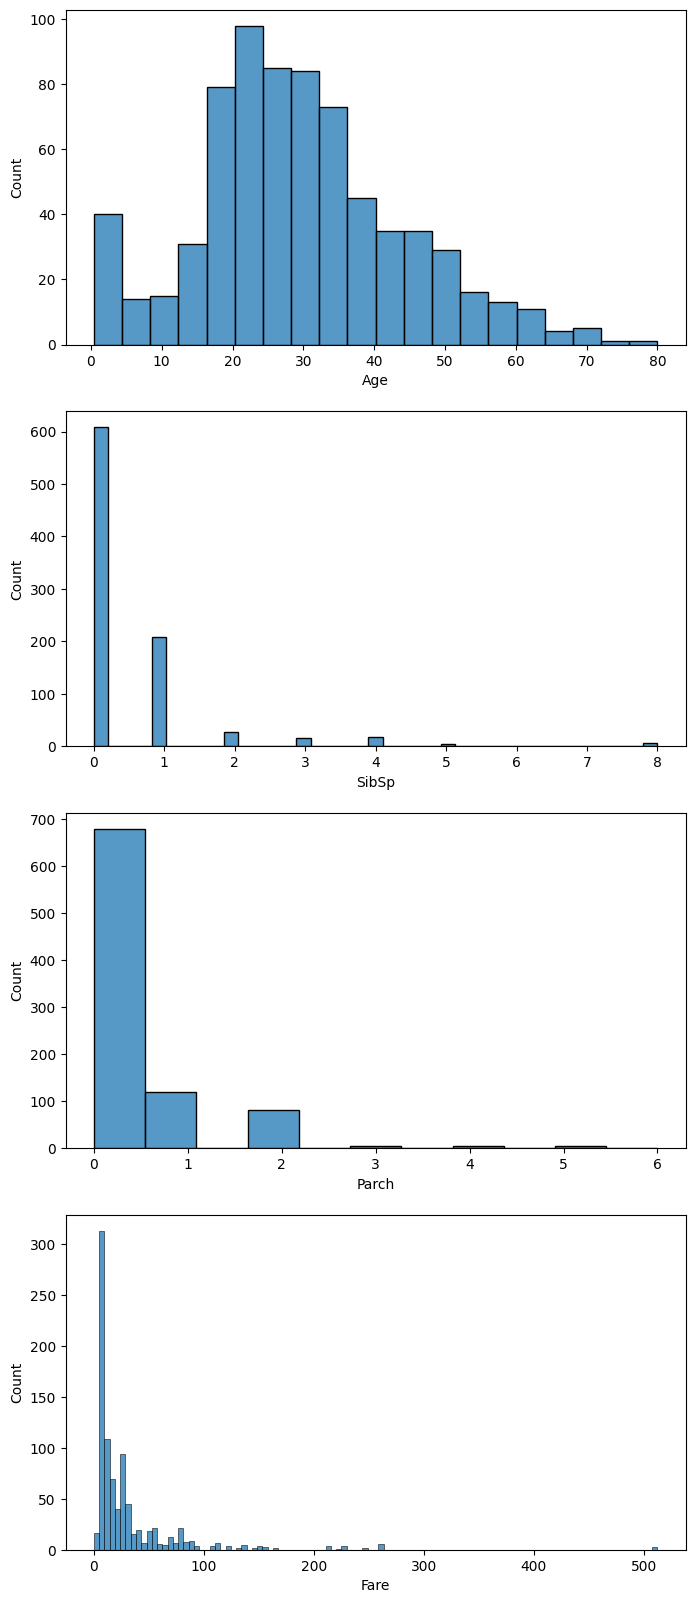

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 20))
for i,j in enumerate(train_num.columns):
    sns.histplot(data=train_num,x=j,ax=axes[i])
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

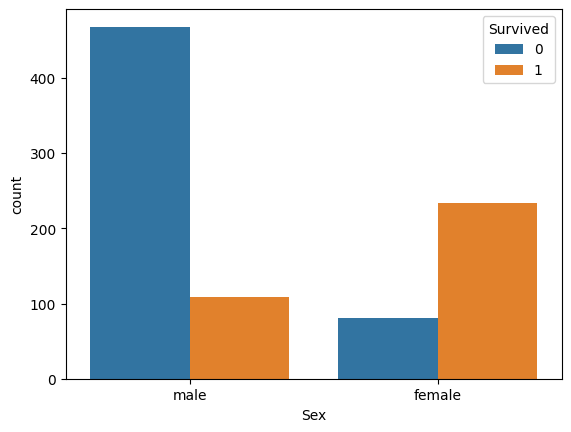

In [13]:
sns.countplot(data=train_cat,x='Sex',hue='Survived')

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Sex', ylabel='count'>

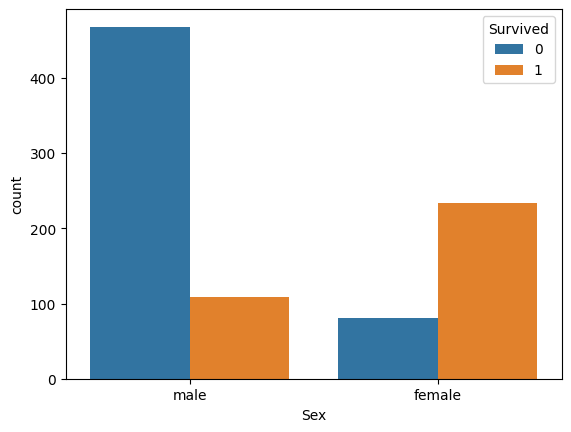

In [15]:
sns.countplot(data=train_cat,x='Sex',hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

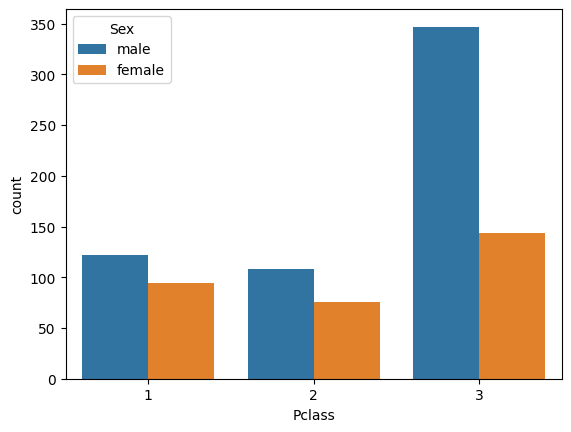

In [16]:
sns.countplot(data=train_cat,x='Pclass',hue='Sex')

<Axes: xlabel='Pclass', ylabel='count'>

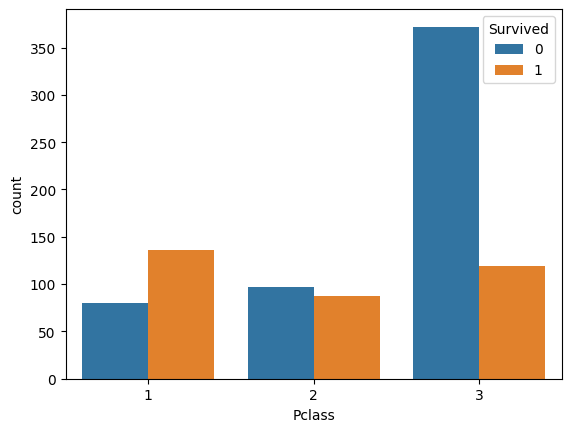

In [17]:
sns.countplot(data=train_cat,x='Pclass',hue='Survived')

<Axes: xlabel='Embarked', ylabel='Fare'>

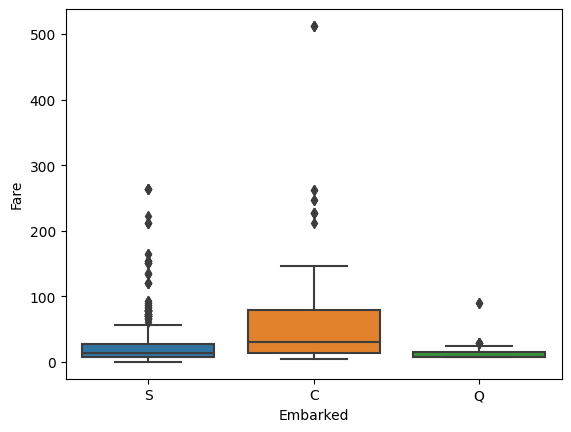

In [18]:
sns.boxplot(data=train,x='Embarked',y='Fare')

<Axes: xlabel='Pclass', ylabel='Fare'>

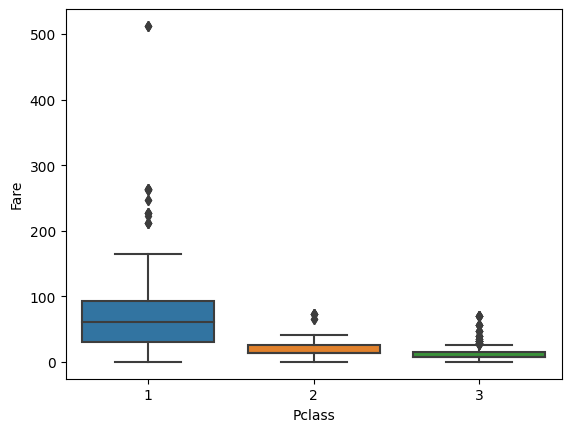

In [19]:
sns.boxplot(data=train,x='Pclass',y='Fare')

## Feature Engineering

### Data Cleaning
Deleting non usable feature

In [20]:
X = train.drop(['Survived','Cabin','Name','Ticket','PassengerId'],axis=1)

In [21]:
y = train['Survived']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder 
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling

## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [24]:
categorical_cols = ['Pclass','Sex','Embarked']
numerical_cols = ['Age','SibSp','Parch','Fare']

In [25]:
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
#     ('label_binarizer' ,LabelBinarizer()),
    ('one_hot_encoder', OneHotEncoder(sparse=False)),
])

preprocessor=ColumnTransformer(
    [
        ('num_pipeline',num_pipeline,numerical_cols),
        ('cat_pipeline',cat_pipeline,categorical_cols)
    ]
)

In [26]:
preprocessor.fit_transform(test_data.drop(['Cabin','Name','Ticket','PassengerId'],axis=1))

array([[ 0.38623105, -0.49947002, -0.4002477 , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.37137004,  0.61699237, -0.4002477 , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.55353683, -0.49947002, -0.4002477 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.70147553, -0.49947002, -0.4002477 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.20485235, -0.49947002, -0.4002477 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.20485235,  0.61699237,  0.61989583, ...,  1.        ,
         0.        ,  0.        ]])

In [27]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())
full_train_data=pd.DataFrame(preprocessor.fit_transform(X),columns=preprocessor.get_feature_names_out())
actual_test_data = pd.DataFrame(preprocessor.transform(test_data.drop(['Cabin','Name','Ticket','PassengerId'],axis=1)),columns=preprocessor.get_feature_names_out())

## Model Traning

In [28]:
## Model Training

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV 
import xgboost as xgb

In [29]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)


# Evaluate the performance of the model
cv = cross_val_score(lr,X_train,y_train,cv=10)
accuracy = cv.mean()
print(f"Accuracy: {accuracy}")


Accuracy: 0.7986440677966101


In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Evaluate the performance of the model
cv = cross_val_score(dt,X_train,y_train,cv=10)
accuracy = cv.mean()
print(f"Accuracy: {round(accuracy,2)}")

Accuracy: 0.76


In [31]:
from sklearn.ensemble import RandomForestClassifier
#  Random Forest model for classification
rf = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=42)

# Train the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
cv = cross_val_score(rf,X_train,y_train,cv=10)
accuracy = cv.mean()
print(f"Accuracy: {accuracy}")

Accuracy: 0.7986440677966102


In [32]:
svc = SVC(kernel='rbf')  

# Train the model on the training set
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc.predict(X_test)

# Evaluate the performance of the model
cv = cross_val_score(svc,X_train,y_train,cv=10)
accuracy = cv.mean()
print(f"Accuracy: {round(accuracy,2)}")

Accuracy: 0.81


## Bagging

In [33]:
bagging_svc = BaggingClassifier(estimator=SVC(),n_estimators=100, random_state=42)
bagging_svc.fit(X_train,y_train)
y_pred = bagging_svc.predict(X_test)

# Evaluate the performance of the model
cv = cross_val_score(bagging_svc,X_train,y_train,cv=10)
accuracy = cv.mean()
print(f"Accuracy: {round(accuracy,4)}")

Accuracy: 0.8153


In [34]:
bagging_dt = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100, random_state=42)
bagging_dt.fit(X_train,y_train)
y_pred = bagging_dt.predict(X_test)

# Evaluate the performance of the model
cv = cross_val_score(bagging_dt,X_train,y_train,cv=10)
accuracy = cv.mean()
print(f"Accuracy: {round(accuracy,2)}")

Accuracy: 0.78


## Boosting

In [35]:
xgboosting = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Train the model on the training set
xgboosting.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgboosting.predict(X_test)

# Evaluate the performance of the model
cv = cross_val_score(xgboosting,X_train,y_train,cv=10)
accuracy = cv.mean()
print(f"Accuracy: {round(accuracy,4)}")


Accuracy: 0.7955


In [36]:
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Train the model on the training set
gradient_boosting.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gradient_boosting.predict(X_test)

# Evaluate the performance of the model
cv = cross_val_score(gradient_boosting,X_train,y_train,cv=10)
accuracy = cv.mean()
print(f"Accuracy: {round(accuracy,4)}")


Accuracy: 0.8154


## Fine Tuning

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
param_dist = {
    'estimator__C': np.logspace(-3, 3, 7),
    'estimator__kernel': ['linear', 'rbf', 'poly'],
#     'estimator__degree': [2, 3, 4],
#     'estimator__gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
    'n_estimators': [10, 50, 100],
#     'max_samples': [0.5, 0.7, 1.0],
#     'max_features': [0.5, 0.7, 1.0],
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=bagging_svc,
    param_distributions=param_dist,
    n_iter=10,  # Adjust the number of iterations based on your computational resources
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

# Evaluate the model on the test set
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Parameters:  {'n_estimators': 50, 'estimator__kernel': 'poly', 'estimator__C': 10.0}
Best Accuracy:  0.8104326345532376
Test Accuracy:  0.7932203389830509


In [39]:
best_params = random_search.best_params_
best_params

{'n_estimators': 50, 'estimator__kernel': 'poly', 'estimator__C': 10.0}

In [40]:
#Recreating with best parameter
best_bagging_svc = BaggingClassifier(estimator=SVC(kernel = 'poly',C = 10.0),n_estimators=50)
best_bagging_svc.fit(X_train,y_train)
y_pred = bagging_svc.predict(X_test)

# Evaluate the performance of the model
cv = cross_val_score(bagging_svc,X_train,y_train,cv=10)
accuracy = cv.mean()
print(f"Accuracy: {accuracy}")

Accuracy: 0.8153389830508473


In [41]:
# Creating the model with whole data
full_bagging_svc = BaggingClassifier(estimator=SVC(kernel = 'poly',C = 10.0),n_estimators=50)
full_bagging_svc.fit(full_train_data,y)
predictions = full_bagging_svc.predict(actual_test_data)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission_bagging.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
